<a href="https://colab.research.google.com/github/sir-sauc3/cap-comp215/blob/main/Trial_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from dataclasses import dataclass
from pprint import pprint
import random

import time

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation

In [15]:
# class Deer:
  
#   def __init__(self, loc):
#     self.loc = tuple(loc)

#     weight = 20
#     max_weight = 60
#     metabolism = 5

  
#   def step():
#     #make a random cardinal movement
#     #graze if grass is there
#     #increase weight if deer grazed or decrease weight if deer didnt graze
#     return


def random_walk(n):
  x,y = 0,0

  for i in range(n):
    dx, dy = random.choice([(1,0), (-1,0), (0,1), (0,-1)])
    x+=dx
    y+=dy

  return((x, y))


for i in range(10):
  test = random_walk(15)
  print(f'abs coordinate positions are: {test}')

abs coordinate positions are: (0, -1)
abs coordinate positions are: (0, 3)
abs coordinate positions are: (-2, -1)
abs coordinate positions are: (0, 1)
abs coordinate positions are: (3, 2)
abs coordinate positions are: (5, 0)
abs coordinate positions are: (3, 0)
abs coordinate positions are: (-4, -1)
abs coordinate positions are: (5, 0)
abs coordinate positions are: (0, -1)


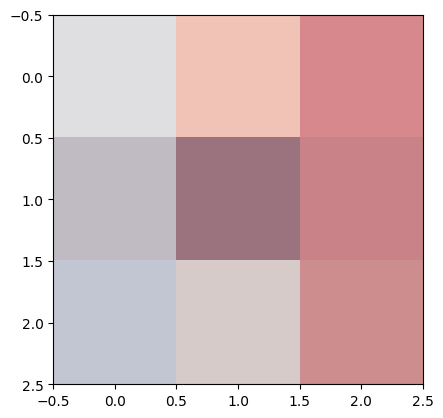

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Create two NumPy arrays of the same size
arr1 = np.random.rand(3, 3)
arr2 = np.random.rand(3, 3)

# Display the arrays over each other using imshow
fig, ax = plt.subplots()
ax.imshow(arr1, cmap='Blues', alpha=0.5)
ax.imshow(arr2, cmap='Reds', alpha=0.5)
plt.show()

[[0.63783735 0.12823588 0.16999503]
 [0.80052003 0.2960163  0.91221229]
 [0.5960382  0.27397673 0.80915373]]


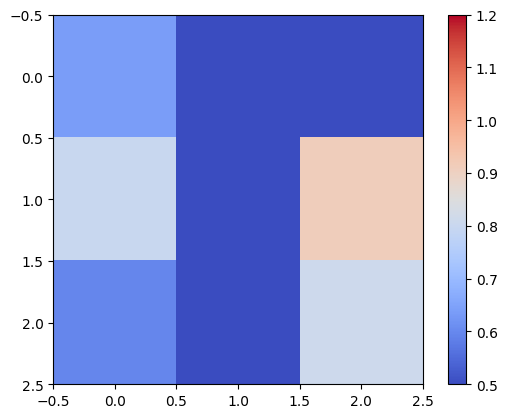

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 3x3 NumPy array with random values
arr = np.random.rand(3, 3)

print(arr)
# Display the array using a custom colormap
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=0.5, vmax=1.2)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()

[[ 0.3981649   0.21698943  0.00443087]
 [ 1.37432801  0.0746661   0.23376347]
 [ 0.65001272  1.27929206 -0.81440667]]


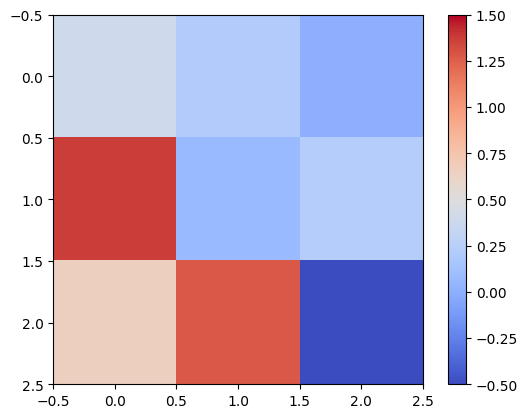

In [27]:
import numpy as np

arr = np.random.uniform(low=-1, high=2, size=(3, 3))

print(arr)
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='coolwarm', vmin=-0.5, vmax=1.5)

# Add a colorbar to show the mapping of values to colors
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()